<div style="text-align: center;">
    <img src="https://mejores.com/wp-content/uploads/2020/08/Universidad-Tecnica-Federico-Santa-Maria.jpg" title="Title text" width="20%" height="20%" />
</div>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF053H Procesamiento y visualización de datos </h1>

<H3 align='center'> Gráficos 2D y Conceptos básicos </H3>
<hr style="height:2px;border:none"/>



**Objetivos de aprendizaje:**
  * Acceder y manipular datos dentro de `DataFrame`
  * Importar datos CSV a un `DataFrame` de *Pandas*

<hr style="height:2px;border:none"/>

# *Dataset*
El principal conjunto de datos utilizado es «Salary Data.csv», que engloba varias características:

- **Edad:** La edad de los empleados.
- **Años de experiencia:** La experiencia laboral total de los empleados.
- **Sexo:** El sexo de los empleados.
- **Cargo:** La designación o función de los empleados.
- **Nivel de estudios:** La titulación educativa más alta de los empleados.
- **Salario:** El salario anual de los empleados (nuestra variable objetivo).

 Cargar un archivo completo en un `DataFrame`. El siguiente ejemplo carga un archivo con datos de viviendas de California. Ejecuta la siguiente celda para cargar los datos y crear definiciones de funciones:

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn  as sns

df = pd.read_csv('../../data/Salary Data.csv')
print(df.shape)
df.head()

(375, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


- `df.info()` : Retorna información (número de filas, número de columnas, índices, tipo de las columnas y memoria usada) sobre el `DataFrame` df.
- `df.shape` : Retorna una tupla con el número de filas y columnas del `DataFrame` df.
- `df.size` : Retorna el número de elementos del `DataFrame`.
- `df.columns` : Retorna una lista con los nombres de las columnas del `DataFrame` df.
- `df.index` : Retorna una lista con los nombres de las filas del `DataFrame` df.
- `df.dtypes` : Retorna una serie con los tipos de datos de las columnas del `DataFrame` df.
- `df.head(n)` : Retorna las `n` primeras filas del `DataFrame` df.
- `df.tail(n)` : Retorna las `n` últimas filas del `DataFrame` df.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.head()

# Análisis exploratorio de datos (EDA)
## 1. Scatter Plot (gráfico de dispersión) para Salary y Age features
Un gráfico de dispersión (scatter plot) muestra puntos de datos en dos dimensiones, donde cada punto representa una observación en el conjunto de datos. En este caso, podemos visualizar cómo se relacionan las características "Salary" (en el eje y) y "Age" (en el eje x).

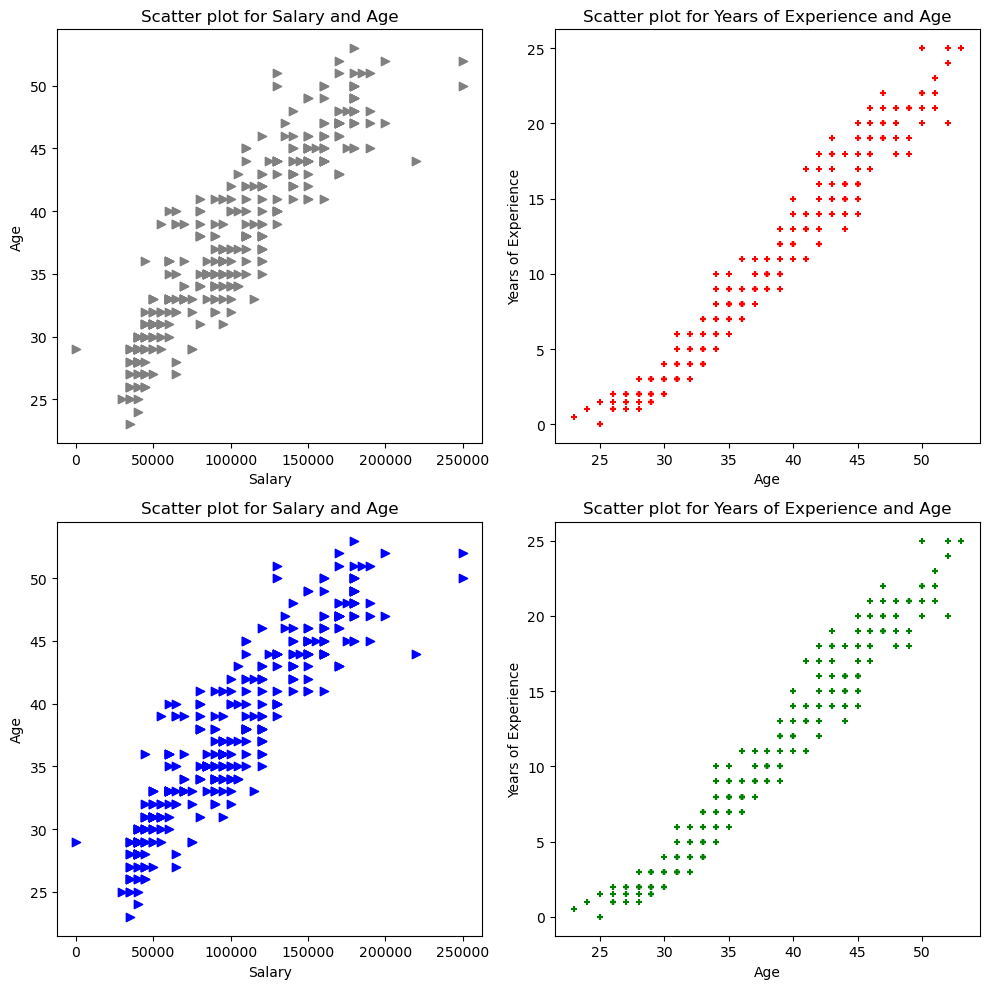

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(df['Salary'], df['Age'], marker = '>', color = 'gray')
plt.ylabel('Age')
plt.xlabel('Salary')
plt.title('Scatter plot for Salary and Age')


plt.subplot(222)
plt.scatter(df['Age'], df['Years of Experience'], marker = '+', s = 15, color = 'red')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.title('Scatter plot for Years of Experience and Age')

plt.subplot(223)
plt.scatter(df['Salary'], df['Age'], marker = '>', color = 'blue')
plt.ylabel('Age')
plt.xlabel('Salary')
plt.title('Scatter plot for Salary and Age')


plt.subplot(224)
plt.scatter(df['Age'], df['Years of Experience'], marker = '+', s = 15, color = 'green')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.title('Scatter plot for Years of Experience and Age')

plt.tight_layout()
plt.show()

## 2. Bar Plots
**Los gráficos de barras son excelentes para comparar datos categóricos**. Ayudan a comparar los valores de diferentes categorías.

**Cuándo Usar:** Los gráficos de barras son efectivos cuando tienes categorías discretas y deseas comparar sus conteos o valores. Por ejemplo, puedes utilizarlos para comparar las ventas de diferentes productos, las calificaciones de los estudiantes en distintas materias, o la distribución de datos a lo largo de diferentes días.


### Agrupación y Agregación en Pandas

En Pandas, el método `groupby()` se utiliza para agrupar los datos según una o más columnas, y luego realizar operaciones de agregación sobre esos grupos utilizando el método `agg()`. Esto es útil cuando se quiere resumir o analizar datos categóricos.


In [7]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
educationSalary = df.groupby('Education Level').agg({'Salary': lambda x: x.mean()}).reset_index()
educationSalary
#agrupar el nivel de educacion y luego agregar la media del salario


,Education Level,Salary
0,Bachelor's,74756.026786
1,Master's,129795.918367
2,PhD,157843.137255


- **Agrupación**: Agrupa el DataFrame `df` por la columna `"Education Level"`, organizando los datos según los diferentes niveles educativos.
- **Agregación**: Aplica la función `mean()` a la columna `"Salary"` dentro de cada grupo, calculando el salario promedio para cada nivel educativo.
- **Restablecer Índice**: Convierte los índices resultantes (niveles educativos) en una columna regular, creando un nuevo DataFrame `educationSalary` con los niveles educativos y sus salarios promedio correspondientes.


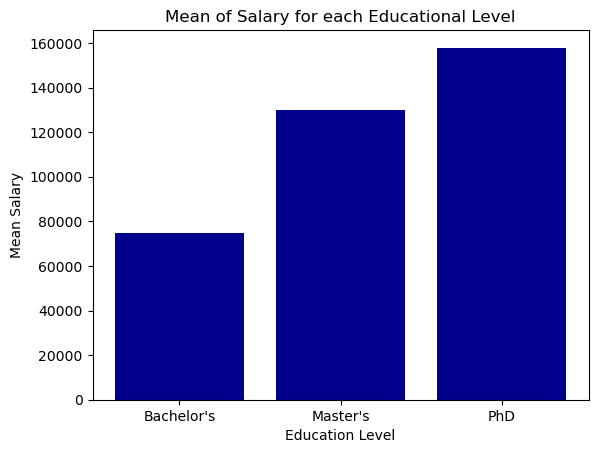

In [9]:
plt.bar(educationSalary['Education Level'], educationSalary['Salary'], color = 'darkblue')
plt.title('Mean of Salary for each Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.show()

El siguiente código agrupa los datos según el nivel educativo y calcula tanto la media como la desviación estándar de los salarios para cada grupo. A continuación, se visualizan estos resultados en un gráfico de barras, donde cada barra tiene un color diferente. Además, en cada barra se muestra el salario promedio junto con su desviación estándar en el formato "mean ± std".

In [10]:
educationSalary_mean = df.groupby('Education Level').agg({'Salary': lambda x: x.mean()}).reset_index()
educationSalary_std = df.groupby('Education Level').agg({'Salary': lambda x: x.std()}).reset_index()
educationSalary_mean

,Education Level,Salary
0,Bachelor's,74756.026786
1,Master's,129795.918367
2,PhD,157843.137255


In [11]:
educationSalary_std

,Education Level,Salary
0,Bachelor's,34777.272704
1,Master's,41659.631919
2,PhD,23393.479903


In [12]:
educationSalary_mean = df.groupby('Education Level').agg({'Salary': lambda x: x.mean()}).reset_index()
educationSalary_std = df.groupby('Education Level').agg({'Salary': lambda x: x.min()}).reset_index()


educationSalary = pd.concat([educationSalary_mean.set_index('Education Level'), 
                             educationSalary_std.set_index('Education Level')], 
                            axis=1).reset_index()

# Renombrar
educationSalary.columns = ['Education Level', 'Salary mean', 'Salary min']
educationSalary.head()


,Education Level,Salary mean,Salary min
0,Bachelor's,74756.026786,350.0
1,Master's,129795.918367,40000.0
2,PhD,157843.137255,110000.0


  Education Level    Salary mean    Salary std
0      Bachelor's   74756.026786  34777.272704
1        Master's  129795.918367  41659.631919
2             PhD  157843.137255  23393.479903


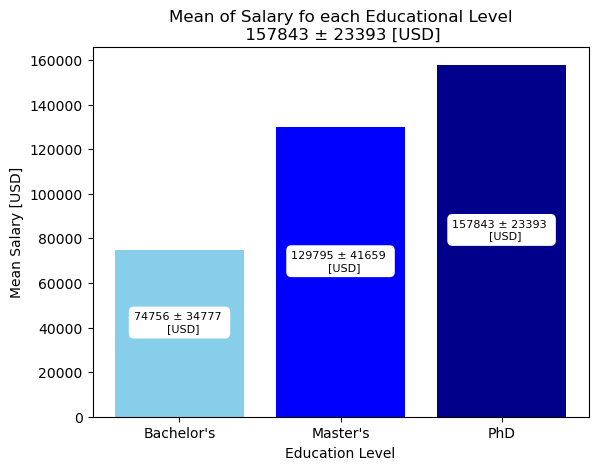

In [13]:
educationSalary = df.groupby('Education Level').agg({'Salary': ['mean', 'std']}).reset_index() #Forma alternativa

educationSalary.columns = ['Education Level', 'Salary mean', 'Salary std']# Renombrar las columnas
print(educationSalary)

bars = plt.bar(educationSalary['Education Level'], educationSalary['Salary mean'], color = ['skyblue','blue', 'darkblue'])

for bar, mean, std in zip(bars, educationSalary['Salary mean'], educationSalary['Salary std']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{int(mean)} ± {int(std)} \n  [USD]',
             ha='center', va='bottom', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.4'))

plt.title('Mean of Salary fo each Educational Level' + f'\n {int(mean)} ± {int(std)} [USD]')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary [USD]' )
plt.show()
#1hr 07 mins

## Ejercicio: 

- Visualice el salario promedio por género mediante un gráfico de barras.
- A partir del DataFrame anterior que contiene información sobre los salarios asociados a diferentes cargos laborales ("Job Title"), identifique  los cinco títulos de trabajo con los salarios promedio más altos y visualizarlos mediante un gráfico de barras.

In [ ]:
df.head()

In [ ]:
# TODO: Completa el código para indentificar y visualizar los cinco títulos de trabajo con los salarios más altos.
# Pista: Usa groupby, agg, y sort_values para agrupar los datos, calcular la media y ordenar los datos (sort_values('Salary', ascending= False))

## 3. Histograms

- Los histogramas muestran la distribución de datos continuos. Agrupan los datos en intervalos (bins) y muestran la frecuencia de los puntos de datos dentro de cada intervalo.

- **Los histogramas son útiles para entender la distribución de los datos e identificar patrones, modas o valores atípicos**. Úsalos cuando quieras visualizar la distribución de frecuencias de una sola variable, como las edades de los participantes, los puntajes de pruebas o los niveles de ingresos.

In [19]:
DFN = df.fillna(0)
DFN.head()
df["Years of Experience"].nunique()

28

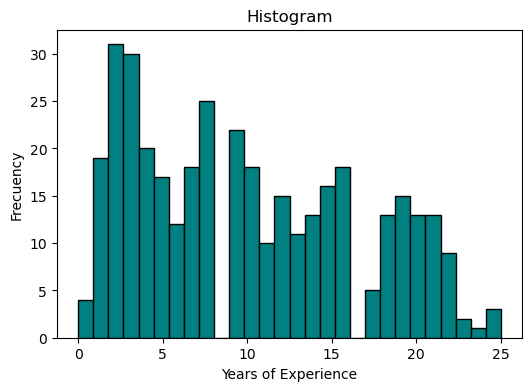

In [18]:
from scipy.stats import norm
plt.figure(figsize=(6, 4))
plt.hist(df['Years of Experience'], bins=28, edgecolor='black', color = 'teal')
plt.title('Histogram')
plt.ylabel('Frecuency')
plt.xlabel('Years of Experience')       
plt.show()

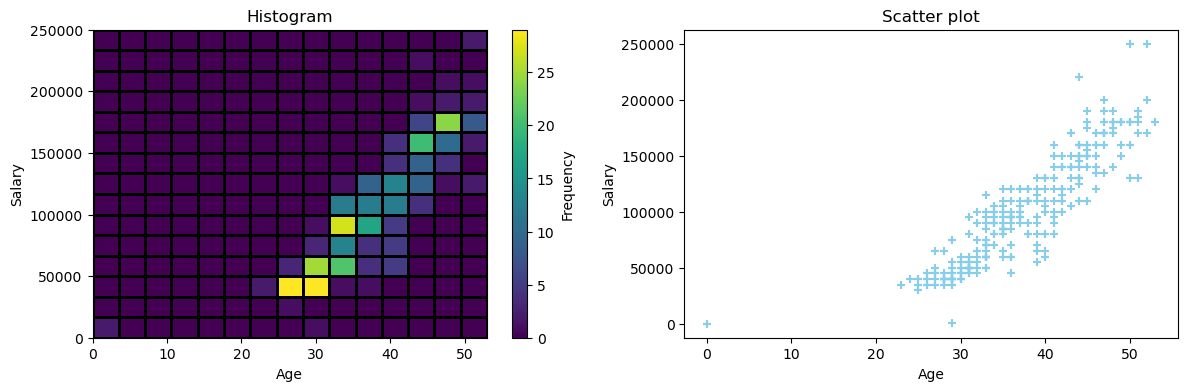

In [16]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.hist2d(DFN['Age'], DFN['Salary'], bins=15, edgecolor='black', cmap = 'viridis')#,
plt.title('Histogram')
plt.ylabel('Salary')
plt.xlabel('Age')       
cbar = plt.colorbar()
cbar.set_label('Frequency')

plt.subplot(122)
plt.scatter(DFN['Age'], DFN['Salary'], marker = '+', color = 'skyblue')
plt.title('Scatter plot')
plt.ylabel('Salary')
plt.xlabel('Age')       
plt.show()
#Tiempo 1.13

## 4. Line Plots

Los gráficos de líneas son útiles para visualizar tendencias y cambios a lo largo del tiempo o en datos continuos. Son efectivos para mostrar patrones, fluctuaciones y relaciones entre variables.

Utiliza gráficos de líneas cuando desees mostrar tendencias, como cambios de una variable a lo largo del tiempo, cambios de temperatura o crecimiento de ventas. También son adecuados para visualizar cómo cambian múltiples variables en relación unas con otras.

  Education Level    Salary mean    Salary std
0      Bachelor's   74756.026786  34777.272704
1        Master's  129795.918367  41659.631919
2             PhD  157843.137255  23393.479903


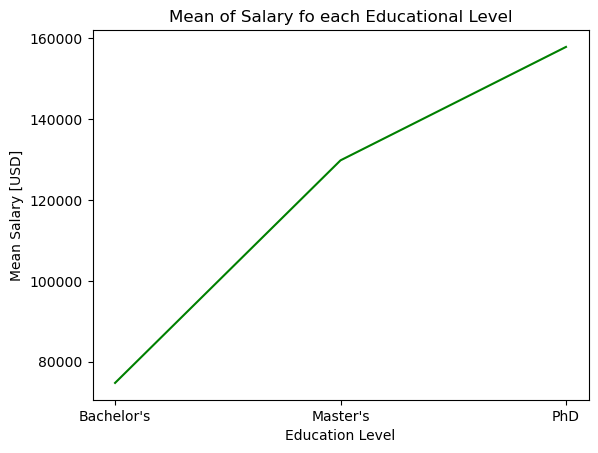

In [20]:
educationSalary = df.groupby('Education Level').agg({'Salary': ['mean', 'std']}).reset_index() #Forma alternativa

educationSalary.columns = ['Education Level', 'Salary mean', 'Salary std']# Renombrar las columnas
print(educationSalary)

plt.plot(educationSalary['Education Level'], educationSalary['Salary mean'], color = 'g')
plt.title('Mean of Salary fo each Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary [USD]')
plt.show()

Ejemplo del uso de plot line:

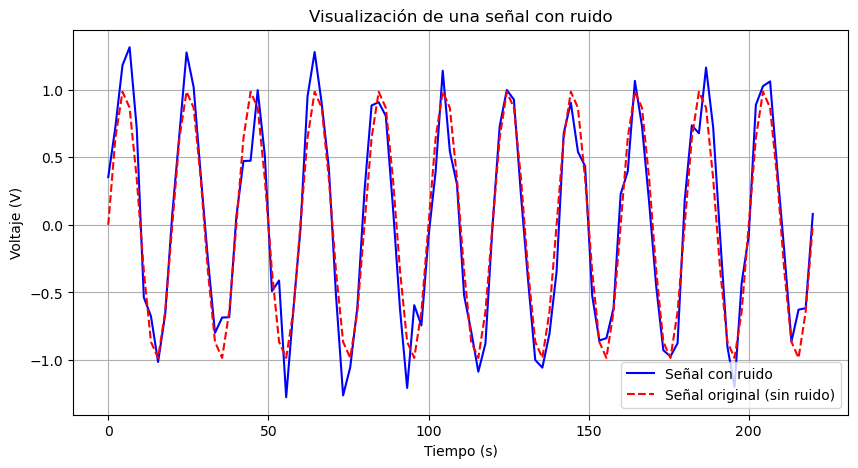

In [21]:
np.random.seed(0)
time = np.linspace(0, 220, 100)  # en segundos
signal = np.sin(2 * np.pi * 50 * time)  # señal sinusoidal (frecuencia de 60 Hz)

noise = np.random.normal(0, 0.2, time.shape) # ruido gaussiano
signal_with_noise = signal + noise

plt.figure(figsize=(10, 5))
plt.plot(time, signal_with_noise, label='Señal con ruido', color='blue')
plt.plot(time, signal, label='Señal original (sin ruido)', color='red', linestyle='--')

plt.title('Visualización de una señal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend()
plt.grid(True)
plt.show()


## 5. Box Plot

Los gráficos de caja proporcionan información sobre la distribución, la mediana y los valores atípicos de un conjunto de datos. Ayudan a identificar la dispersión y la tendencia central de los datos.

Utilice gráficos de caja para comparar distribuciones entre diferentes categorías o grupos. Son útiles para detectar valores atípicos y comprender la dispersión de los datos. Por ejemplo, puede utilizarlos para comparar la distribución de las puntuaciones de los exámenes por asignatura o la distribución de los salarios por puesto de trabajo.


<div style="text-align: center;">
    <img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" title="Title text" width="50%" height="50%" />
</div>

### Explicación del Boxplot

1. **Median (Mediana):**
   - Representada por la línea amarilla dentro de la caja. La mediana es el valor central que divide los datos en dos mitades, lo que significa que el 50% de los valores están por debajo de este punto y el otro 50% por encima.

2. **Interquartile Range (IQR - Rango Intercuartílico):**
   - El IQR es la longitud de la caja, que va desde el primer cuartil (Q1 o 25º percentil) hasta el tercer cuartil (Q3 o 75º percentil). Este rango abarca el 50% central de los datos y es una medida de dispersión.

3. **Q1 (Primer Cuartil):**
   - Representa el 25º percentil de los datos, lo que significa que el 25% de los valores están por debajo de este punto.

4. **Q3 (Tercer Cuartil):**
   - Representa el 75º percentil de los datos, es decir, el 75% de los valores están por debajo de este punto. 

5. **"Minimum" and "Maximum" (Valores Mínimo y Máximo):**
   - Los límites del boxplot se extienden hasta el valor mínimo (Q1 - 1.5*IQR) y el valor máximo (Q3 + 1.5*IQR). Estos límites ayudan a identificar el rango de los datos que no se consideran outliers.

6. **Outliers (Valores Atípicos):**
   - Los puntos fuera de los "bigotes" se consideran outliers o valores atípicos. Estos son valores que están significativamente lejos del resto de los datos y pueden indicar variabilidad inusual o errores.

7. **"Minimum" and "Maximum" Lines:**
   - Estas líneas negras en los extremos de los extremos marcan los límites dentro de los cuales la mayoría de los datos se encuentran. Cualquier valor fuera de estos límites se marca como outlier.

---

Este tipo de gráfico es útil para visualizar la distribución de un conjunto de datos, resumiendo su rango, su dispersión y la presencia de outliers.


In [23]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


['Male' 'Female' nan]


/var/folders/mv/x4535gd14q180w0c1bdw9dvw0000gn/T/ipykernel_14211/2724910671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data[0][0] = 5e5 #outliyer
/var/folders/mv/x4535gd14q180w0c1bdw9dvw0000gn/T/ipykernel_14211/2724910671.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplots = plt.boxplot(gender_data, labels= df_gender, patch_artist=True)


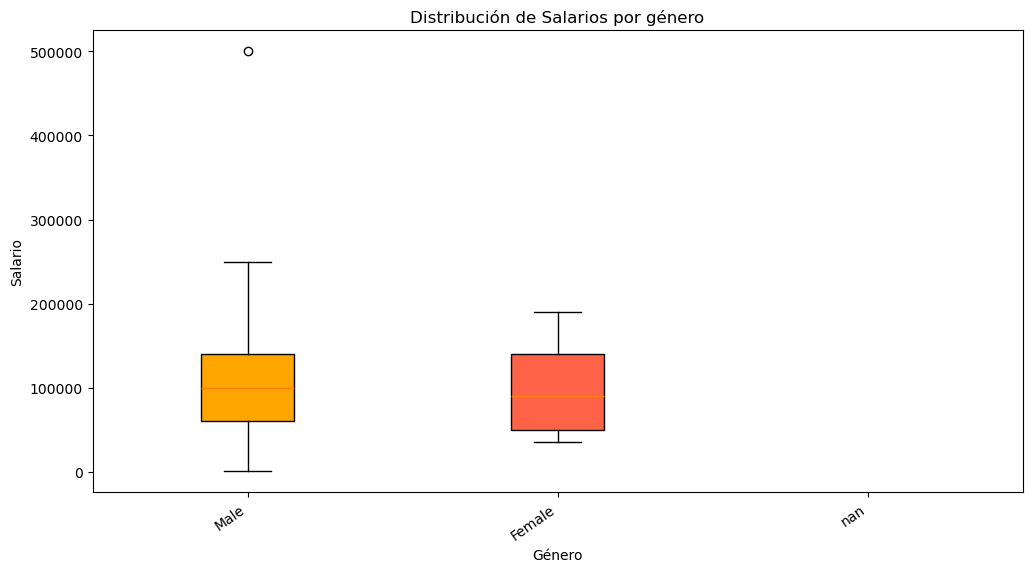

In [24]:
df_gender = df['Gender'].unique()
print(df_gender)
gender_data = [df[df['Gender'] == type_gender]['Salary'] for type_gender in df_gender]
gender_data[0][0] = 5e5 #outliyer
plt.figure(figsize=(12, 6))
bplots = plt.boxplot(gender_data, labels= df_gender, patch_artist=True)

plt.title('Distribución de Salarios por género')
plt.xlabel('Género')
plt.ylabel('Salario')
plt.xticks(rotation=35, ha='right')


colors = ['orange', 'tomato']
for patch, color in zip(bplots['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

['Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist']


/var/folders/mv/x4535gd14q180w0c1bdw9dvw0000gn/T/ipykernel_14211/1590746671.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_data, labels=job_titles, patch_artist=True)


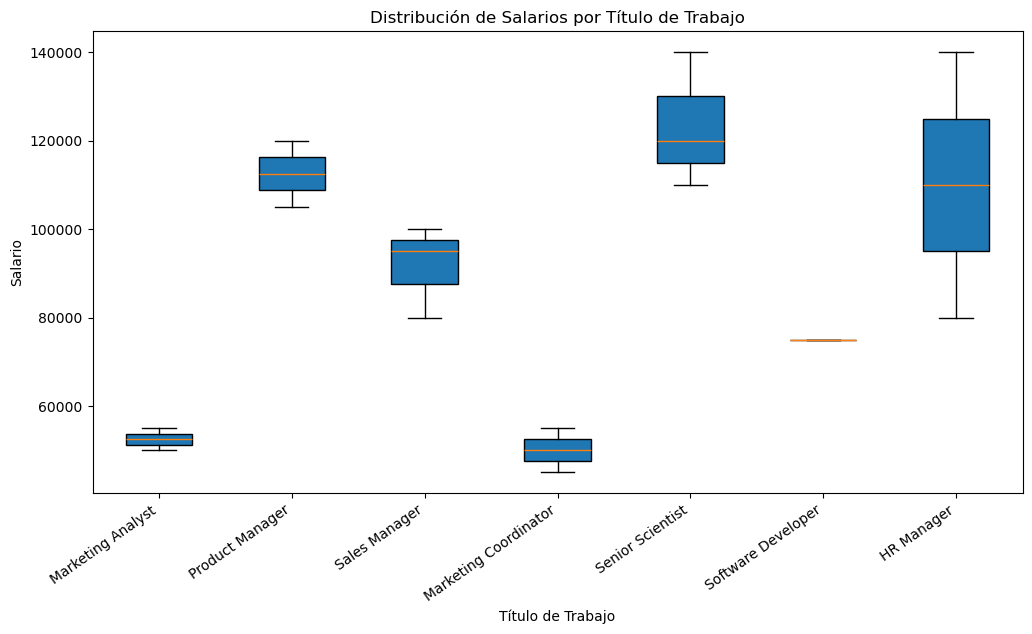

In [25]:
job_titles = df['Job Title'].unique()[5:12]
print(job_titles[:5])
salary_data = [df[df['Job Title'] == job]['Salary'] for job in job_titles]

plt.figure(figsize=(12, 6))
plt.boxplot(salary_data, labels=job_titles, patch_artist=True)

plt.title('Distribución de Salarios por Título de Trabajo')
plt.xlabel('Título de Trabajo')
plt.ylabel('Salario')
plt.xticks(rotation=35, ha='right')
plt.show()

# 6. Area Plot

 Los gráficos de área muestran las tendencias de los datos acumulados a lo largo del tiempo o de variables continuas. Son útiles para comprender la contribución de cada categoría al total.

Utilice gráficos de área para visualizar cómo las partes contribuyen al todo. Suelen utilizarse para el seguimiento de valores acumulativos, como las ventas por categoría de producto a lo largo del tiempo o la distribución de gastos en un presupuesto.

       Product_1  Product_2  Product_3
Month                                 
Jan           10         12          5
Feb           15          7          9
Mar           12         13          6
Apr           14         13          8
May           12         19         10
Jun           20         21         13


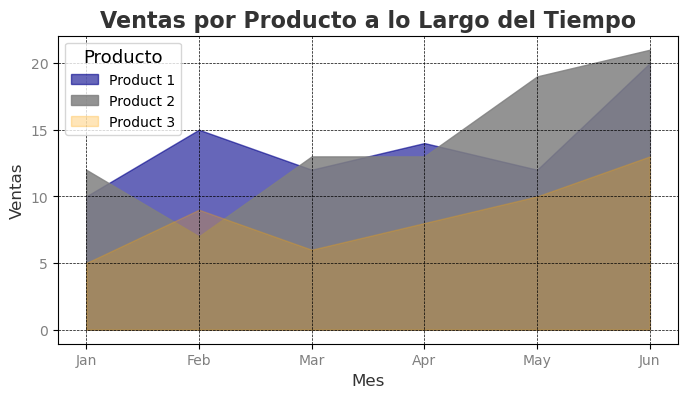

In [26]:
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Product_1': [10, 15, 12, 14, 12, 20],
    'Product_2': [12, 7, 13, 13, 19, 21],
    'Product_3': [5, 9, 6, 8, 10, 13]
}

df2 = pd.DataFrame(data)
df2.set_index('Month', inplace=True) #el mes como el index
print(df2)

plt.figure(figsize=(8, 4))

plt.fill_between(df2.index, df2['Product_1'], color='darkblue', alpha=0.6, label='Product 1')
plt.fill_between(df2.index, df2['Product_2'], color='gray', alpha=0.85, label='Product 2')
plt.fill_between(df2.index, df2['Product_3'], color='orange', alpha=0.28, label='Product 3')

plt.title('Ventas por Producto a lo Largo del Tiempo', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Mes', fontsize=12, color='#333333')
plt.ylabel('Ventas', fontsize=12, color='#333333')
plt.legend(title='Producto', loc='upper left', fontsize=10, title_fontsize='13')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='k')
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')
plt.show()

       Product_1  Product_2  Product_3
Month                                 
Jan           10         12          5
Feb           15          7          9
Mar           12         13          6
Apr           14         13          8
May           12         19         10
Jun           20         21         13


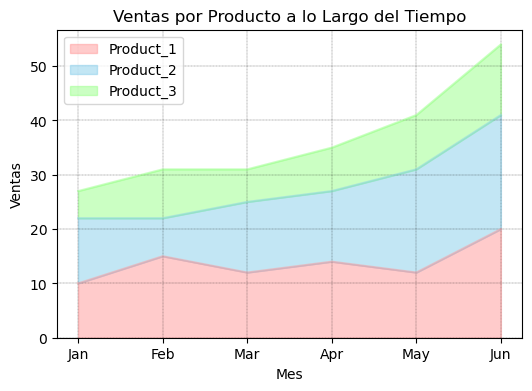

In [27]:
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Product_1': [10, 15, 12, 14, 12, 20],
    'Product_2': [12, 7, 13, 13, 19, 21],
    'Product_3': [5, 9, 6, 8, 10, 13]
}

df2 = pd.DataFrame(data)
df2.set_index('Month', inplace=True) #el mes como el index
print(df2)
colors = ['#FF9999', 'skyblue', '#99FF89']
ax = df2.plot(kind='area', stacked=True, color=colors, alpha=0.5, figsize=(6, 4))

plt.title('Ventas por Producto a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True, linestyle='--', linewidth=0.2, color='k')
plt.show()

### Ejercicio: 
Realice el gráfico anterior sin sobreponer la información con la función stacked.

In [ ]:
# Escribe tu código aquí:

# 7. Pie Chart

Los gráficos circulares muestran la proporción de cada categoría en un conjunto de datos. Representan partes de un todo.

Utilice los gráficos circulares cuando desee mostrar la contribución relativa de las distintas categorías a un total. Sin embargo, **utilícelos con precaución, ya que pueden resultar difíciles de interpretar cuando hay demasiadas categorías o cuando las diferencias en las proporciones son pequeñas.**

In [ ]:
df.head()

### Distribución de género

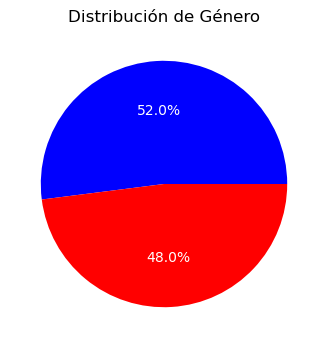

In [28]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=360,
         textprops={'color':'white', 'fontsize': 10})
plt.title('Distribución de Género')
plt.show()


### Distribución de niveles de educación
Realizar un gráfico circular para visualizar la distribución de los ejemplos contenidos en el dataset de acuerdo a su nivel de educación.

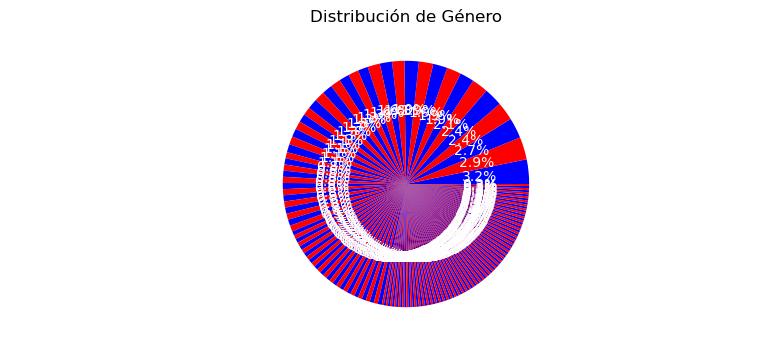

In [29]:
# Escribe tu código aquí:
gender_counts = df['Job Title'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=360,
         textprops={'color':'white', 'fontsize': 10})
plt.title('Distribución de Género')
plt.show()

El parámetro `startangle` en la función `plt.pie()` de `matplotlib` se utiliza para especificar el ángulo en el que comienza a dibujarse el primer segmento del gráfico de pastel (pie chart). Este ángulo se mide en grados, comenzando desde el eje horizontal derecho (a las 3 en punto en un reloj).

- **`startangle=0`**: El primer segmento del gráfico de pastel comenzará a dibujarse desde el ángulo de 0 grados, que está alineado con el eje horizontal derecho (la posición de las 3 en punto en un reloj).
- **`startangle=90`**: El primer segmento comenzará a dibujarse desde la parte superior (a las 12 en punto en un reloj).
- **`startangle=180`**: El primer segmento comenzará a dibujarse desde el eje horizontal izquierdo (a las 9 en punto en un reloj).
- **`startangle=140`**: En este caso específico, el primer segmento comenzará a dibujarse desde 140 grados, lo que significa que el gráfico comenzará en una posición ligeramente por debajo y a la izquierda del centro del gráfico.


# Distribución de títulos de trabajo

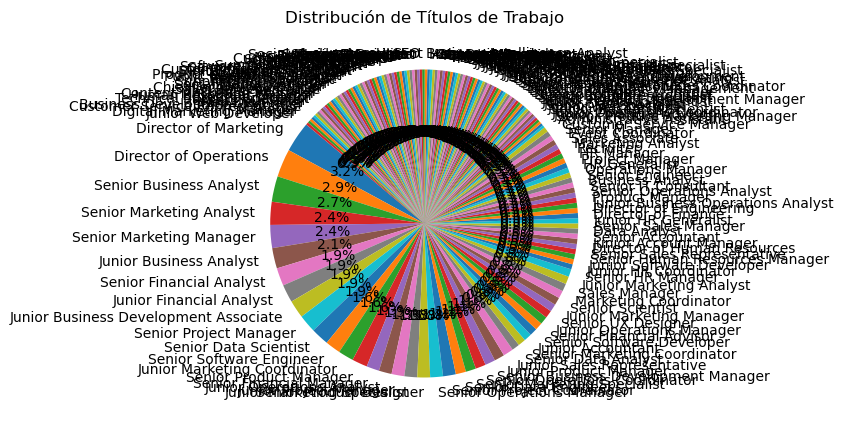

In [30]:
job_title_counts = df['Job Title'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Títulos de Trabajo')
plt.show()

Si seleccionamos solo algunos títulos de trabajo, se hace difícil interpretar el gráfico y realizar comparaciones.

Job Title
Director of Marketing       12
Director of Operations      11
Senior Business Analyst     10
Senior Marketing Analyst     9
Senior Marketing Manager     9
Name: count, dtype: int64


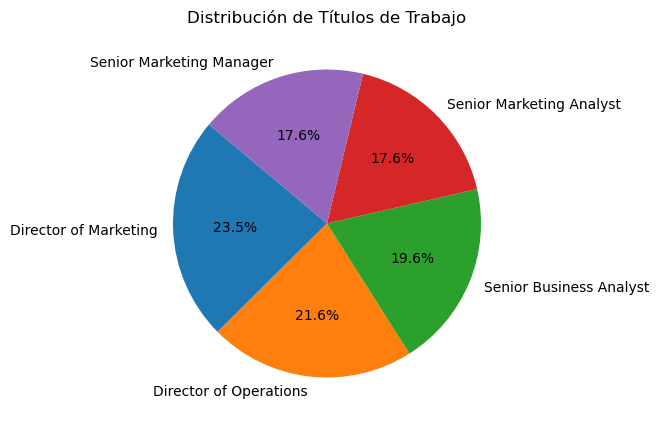

In [33]:
job_title_counts = df['Job Title'].value_counts()[:5]
print(job_title_counts)

plt.figure(figsize=(5, 5))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Títulos de Trabajo')
plt.show()

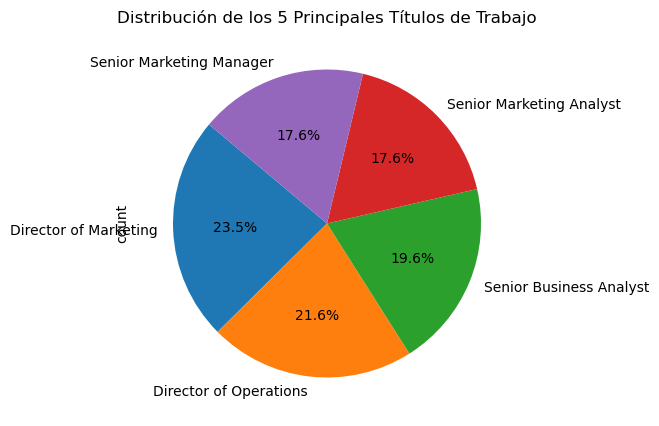

In [32]:
top_n = 5
job_title_counts = df['Job Title'].value_counts().nlargest(top_n)
job_title_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(5, 5))
plt.title(f'Distribución de los {top_n} Principales Títulos de Trabajo')
#plt.ylabel('')
plt.show()

# 9. Hexbin Plot
Los gráficos Hexbin visualizan la distribución de un gran conjunto de datos a través de intervalos hexagonales. Ayudan con la densidad de datos y el solapamiento.

CUtilice gráficos hexagonales **cuando tenga un gran conjunto de datos con puntos de datos superpuestos**. Proporcionan una manera de mostrar la densidad de datos y patrones, especialmente en gráficos de dispersión donde muchos puntos se superponen. 

Text(0, 0.5, 'Salario')

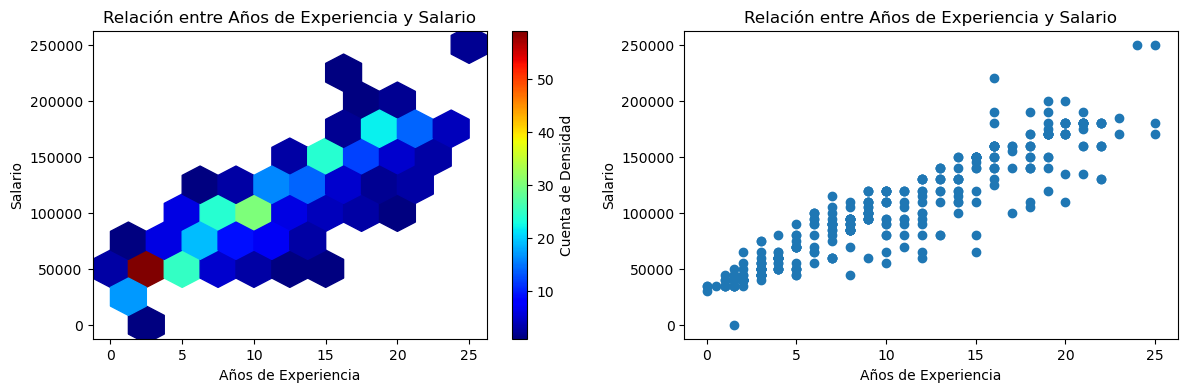

In [34]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
hb = plt.hexbin(df['Years of Experience'],
 df['Salary'], gridsize=10, cmap='jet', mincnt=1)
plt.colorbar(hb, label='Cuenta de Densidad')
plt.title('Relación entre Años de Experiencia y Salario')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.subplot(122)
plt.scatter(df['Years of Experience'], df['Salary'])
plt.title('Relación entre Años de Experiencia y Salario')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')

- **`gridsize=20`**: Define el tamaño de la cuadrícula de hexágonos. Un número mayor de `gridsize` hace hexágonos más pequeños, mostrando más detalles.
- **`cmap='Blues'`**: Aplica un mapa de colores a los hexágonos, donde colores más oscuros representan mayor densidad de puntos.
- **`mincnt=1`**: Asegura que los hexágonos vacíos no se muestren (solo se mostrarán hexágonos con al menos un punto).


In [ ]:
df.head()

Covariance Matrix:
                     Years of Experience            Age        Salary
Years of Experience            42.994343      45.384506  2.942752e+05
Age                            45.384506      49.971792  3.145275e+05
Salary                     294275.229900  314527.546557  2.327099e+09


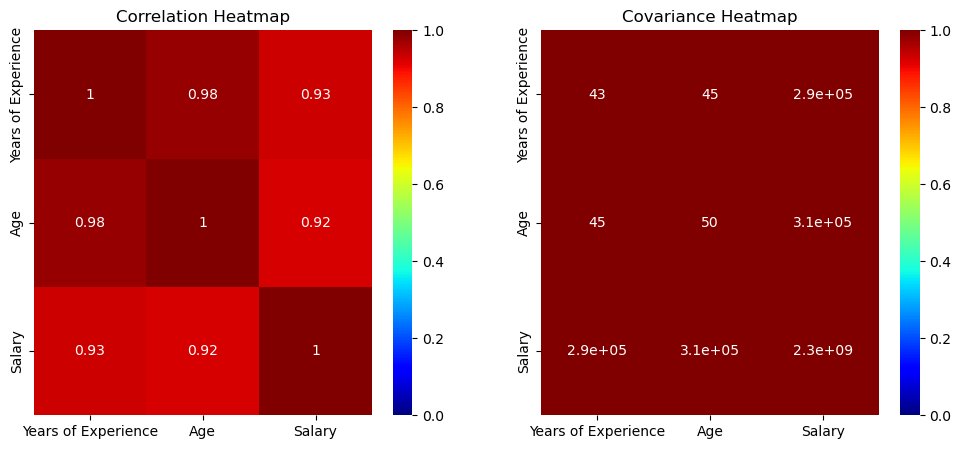

In [35]:
# Calculate pairwise correlation coefficients
matrix = df[['Years of Experience', 'Age', 'Salary']].dropna()
cov_matrix =  matrix.cov() #np.cov(matrix, rowvar = False)
corr_matrix = matrix.corr()

print("Covariance Matrix:")
print(cov_matrix)


plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.heatmap(corr_matrix, annot=True,
            cmap="jet", vmin=0.0, vmax=1.0)
plt.title('Correlation Heatmap')
plt.subplot(122)
sns.heatmap(cov_matrix, annot=True,
            cmap="jet", vmin=0.0, vmax=1.0)
plt.title('Covariance Heatmap')
plt.show()

# Visualización de Datos con `sns.pairplot`

La función `pairplot` de Seaborn es una herramienta útil para explorar las relaciones entre múltiples variables en un dataset. Genera una matriz de gráficos de dispersión que muestra interacciones bivariadas y distribuciones univariadas, permitiendo la identificación de patrones, correlaciones, y outliers.

### Ejemplo Visual

Si tienes un DataFrame con las variables `X1`, `X2`, y `X3`, el `pairplot` podría verse así:

|      | `X1`                             | `X2`                            | `X3`                            |
|------|----------------------------------|----------------------------------|----------------------------------|
| `X1` | Histograma/Distribución de `X1`  | Dispersión de `X1` vs `X2`       | Dispersión de `X1` vs `X3`       |
| `X2` | Dispersión de `X2` vs `X1`       | Histograma/Distribución de `X2`  | Dispersión de `X2` vs `X3`       |
| `X3` | Dispersión de `X3` vs `X1`       | Dispersión de `X3` vs `X2`       | Histograma/Distribución de `X3`  |

En resumen, los gráficos en la diagonal te permiten observar la distribución de cada variable individualmente, mientras que los gráficos fuera de la diagonal muestran las relaciones entre las diferentes variables.

In [ ]:
df.head()

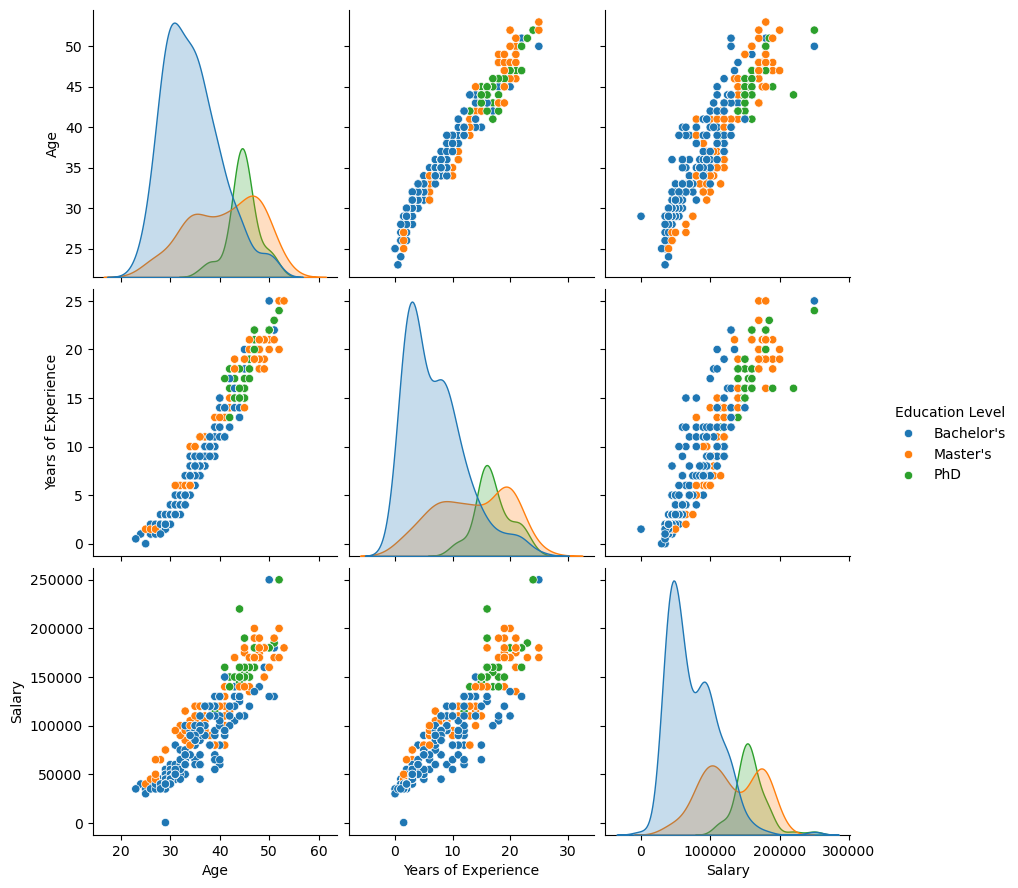

In [36]:
import seaborn as sns
sns.pairplot(df, hue= 'Education Level', height=3)

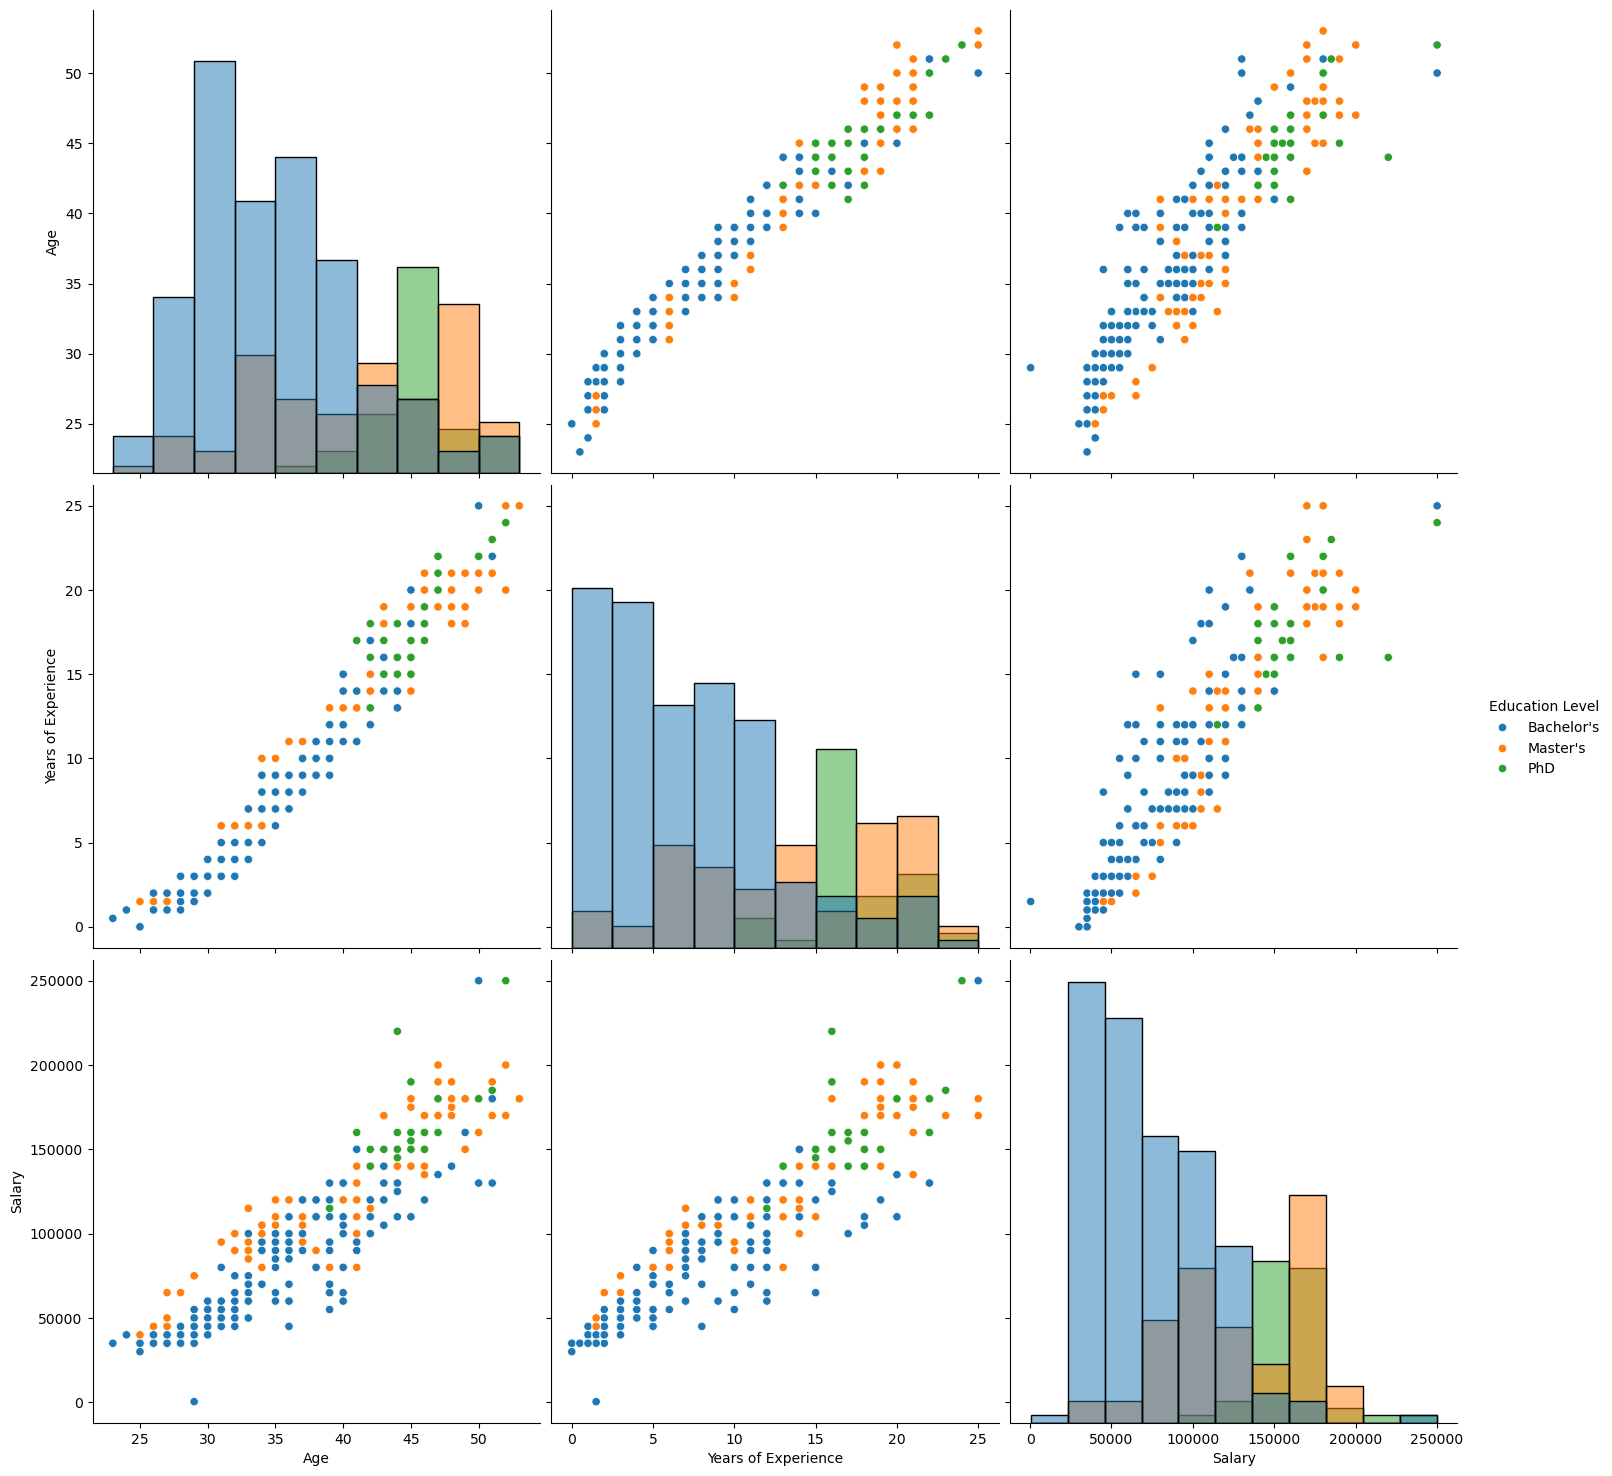

In [37]:
import seaborn as sns
sns.pairplot(df, hue= 'Education Level', height=5, diag_kind="hist")

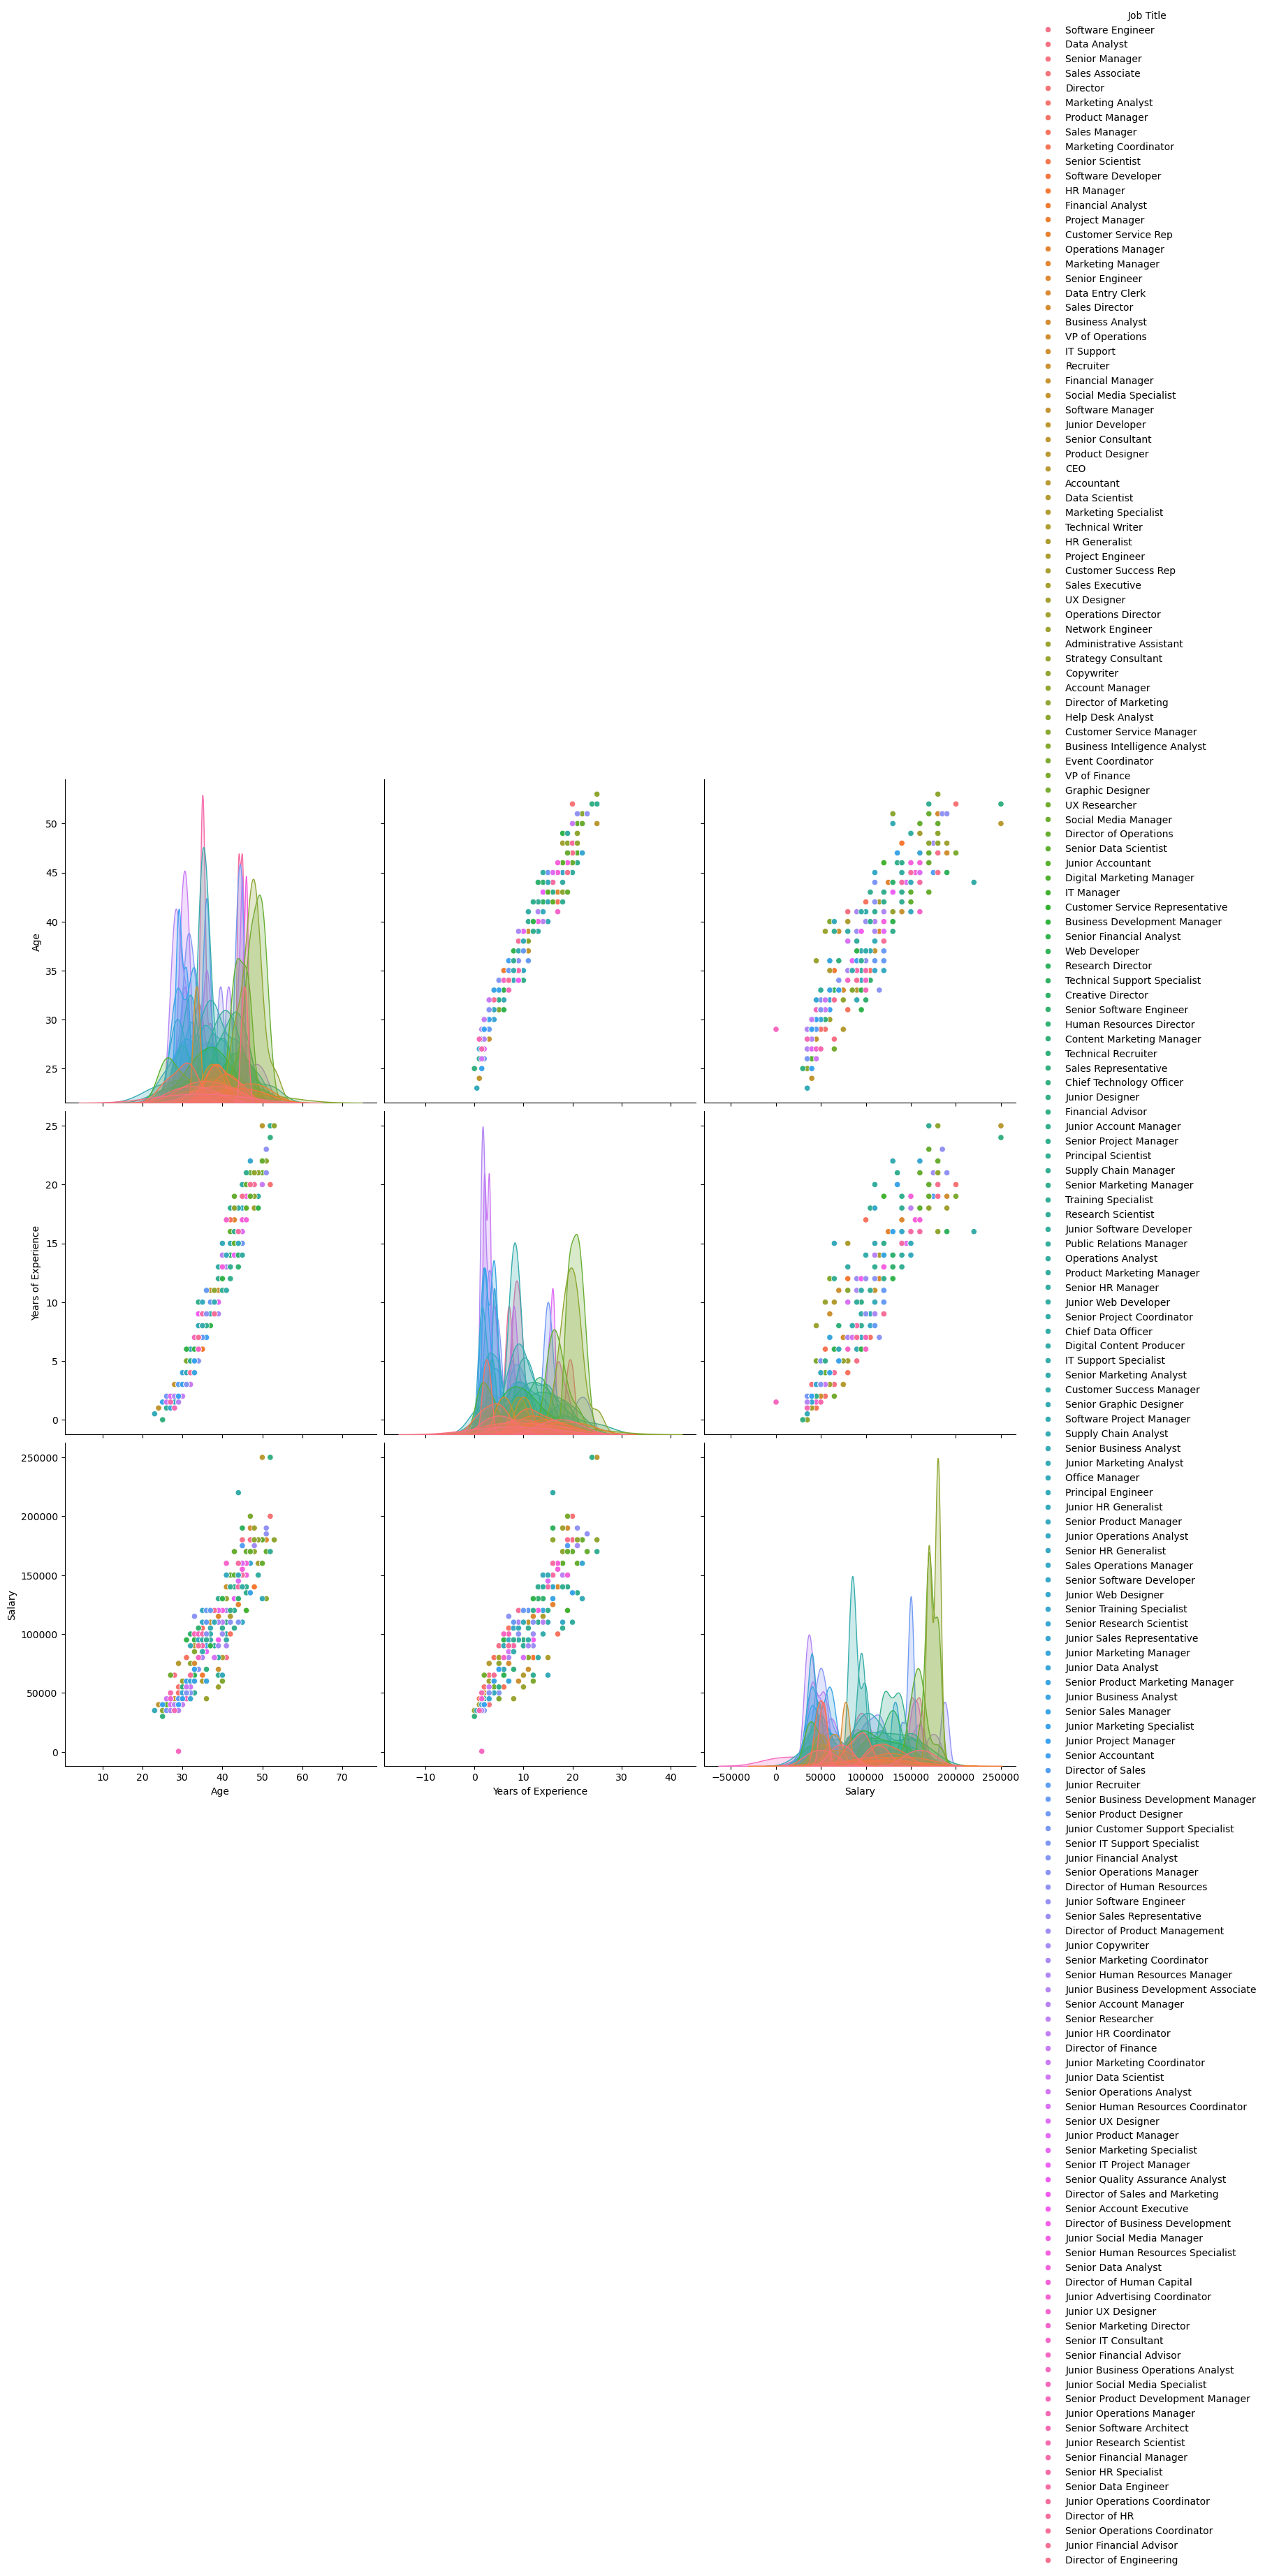

In [38]:
import seaborn as sns
sns.pairplot(df, hue= 'Job Title', height=5)

# Ejemplo: Dataser Iris

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


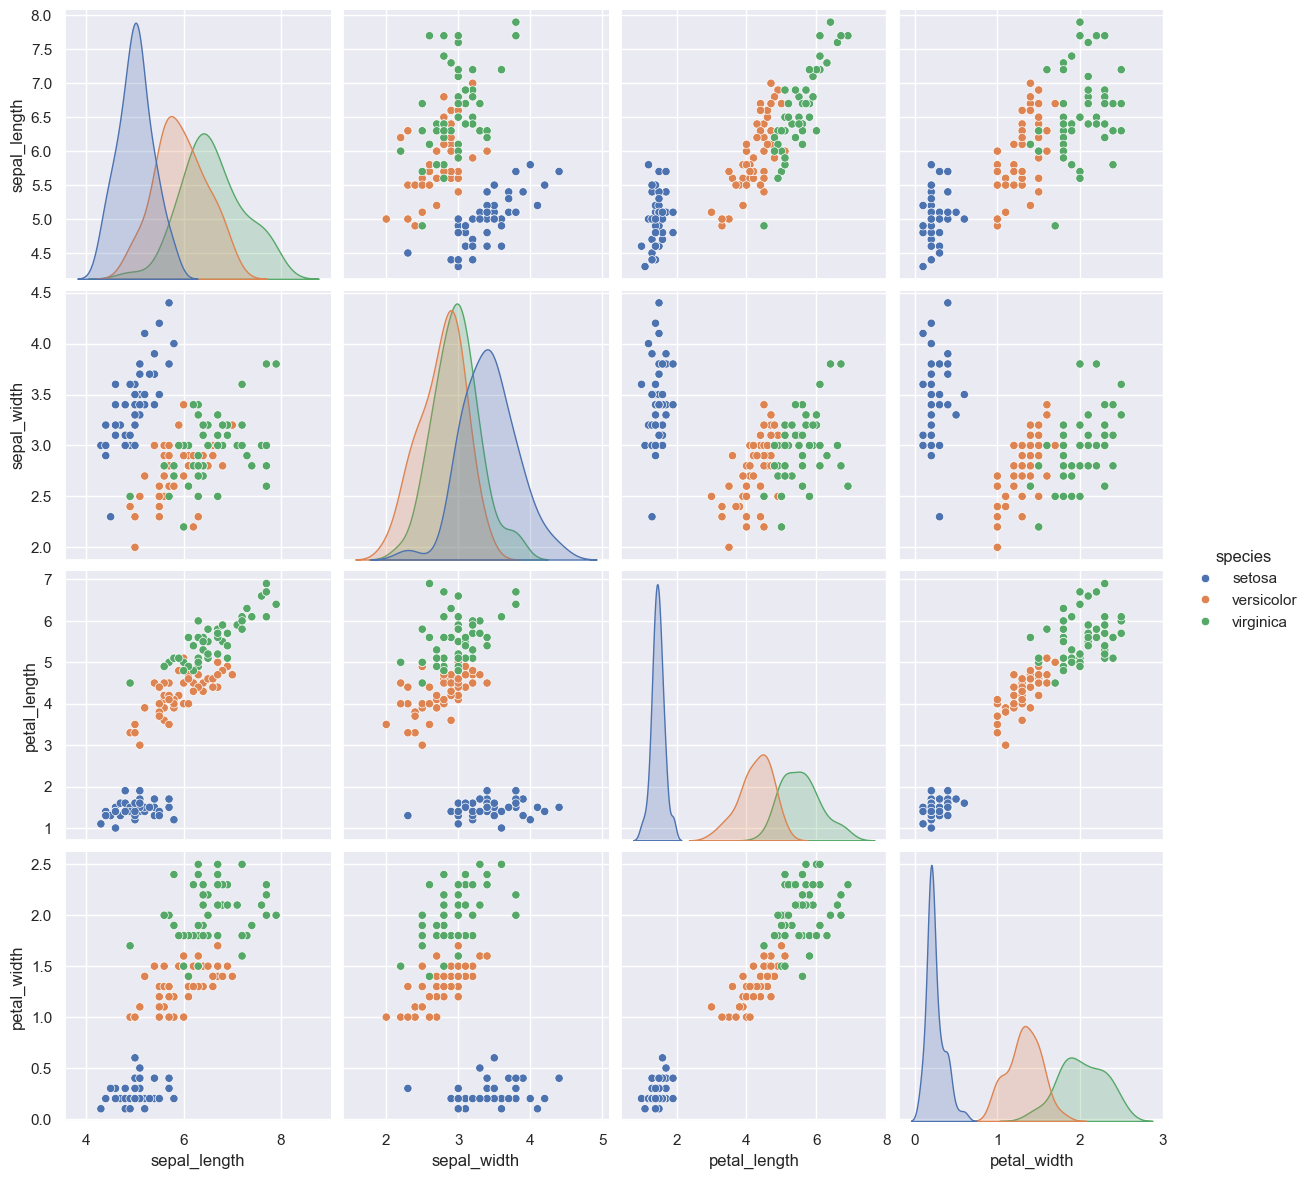

In [39]:
import seaborn as sns
iris = sns.load_dataset('iris')
%matplotlib inline
import seaborn as sns; sns.set()
print(iris.head())
sns.pairplot(iris, hue='species', height=3);

# Visualización 3D

In [ ]:
iris

In [40]:
import plotly.express as px
import seaborn as sns


iris = sns.load_dataset('iris')


fig = px.scatter_3d(
    iris, 
    x='sepal_length',  
    y='sepal_width',   
    z='petal_length',  
    color='species',   
    title='Iris dataset en 3D'
)
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(111, projection='3d')


for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    ax.scatter(
        species_data['sepal_length'], 
        species_data['sepal_width'], 
        species_data['petal_length'], 
        label=species
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('Iris dataset en 3D')


ax.set_xlim([iris['sepal_length'].min() - 10, iris['sepal_length'].max() + 10])

ax.legend()
plt.subplots_adjust(left=2, right=3, top=0.9, bottom=0.1)

plt.show()




In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Cargar el dataset Iris usando seaborn
iris = sns.load_dataset('iris')

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111, projection='3d')

for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    ax.scatter(
        species_data['sepal_length'], 
        species_data['sepal_width'], 
        species_data['petal_length'], 
        label=species
    )

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('Iris dataset en 3D')

ax.set_xlim([iris['sepal_length'].min() - 1, iris['sepal_length'].max() + 1])
ax.set_ylim([iris['sepal_width'].min() - 1, iris['sepal_width'].max() + 1])
ax.set_zlim([iris['petal_length'].min() - 1, iris['petal_length'].max() + 1])

ax.legend()


plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)

plt.show()

[Documentación de `seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
